<a href="https://colab.research.google.com/github/Emily-Hsu2004/edu-data-mining-/blob/main/%E7%B7%B4%E7%BF%92/week3-%E8%AA%B2%E5%A0%82%E7%B7%B4%E7%BF%921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課堂作業1
力宇平台資料-力宇教育-時數報表113.08.01-113.12.31
https://docs.google.com/spreadsheets/d/1xvejsHOwB55WaoastSA5uQ2BAK2IChWKQSNmFf5Tb6I/edit?usp=sharing

## 檔案下載

### 獲得google 權限

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

### 加載到colab

In [2]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
lu_gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1xvejsHOwB55WaoastSA5uQ2BAK2IChWKQSNmFf5Tb6I/edit?usp=sharing')

In [3]:
# 從 gsheets 的 All-whiteboard-device 載入 sheets
lu_sheets = lu_gsheets.worksheet('金寧國中').get_all_values()
# 將 sheets1 資料載入 pd 的 DataFrame 進行分析
df_0 = pd.DataFrame(lu_sheets[1:], columns=lu_sheets[0])
# 取得最前面的5筆資料
df_0.head()

,學校名稱,年級,帳號,座號,學生姓名,班級,科目,指派測驗平均成績,老師指派測驗數,老師指派測驗完成數,老師指派測驗題目數,自我練習平均成績,自我測驗卷數,自我練習題目數,完成老師指派影片數,自我點播影片數,累積影片總時數
0,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-自然(113建立),自然,0,0,0,0,0,0,0,0,0,00:00:00
1,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-國文(113建立),國語文,0,0,0,55,0,0,0,0,0,00:00:00
2,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-社會(113建立),社會,0,0,0,0,0,0,0,0,0,00:00:00
3,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-英語文(113建立),英語文,0,0,0,0,0,0,0,0,0,00:00:00
4,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-數學(113建立),數學,70,1,1,20,70,0,0,0,0,00:00:00


## 初步檢查

In [35]:
type(df_0['指派測驗平均成績'][0])

numpy.int64

### 轉成數字格式

In [4]:
columns_to_convert = [
    '指派測驗平均成績', '老師指派測驗完成數', '老師指派測驗題目數',
    '自我練習平均成績', '自我測驗卷數', '自我練習題目數',
    '完成老師指派影片數', '自我點播影片數','年級'
]

for col in columns_to_convert:
    df_0[col] = pd.to_numeric(df_0[col], errors='coerce').fillna(0).astype(int)


## 資料觀察

In [5]:
print(df_0.columns)

Index(['學校名稱', '年級', '帳號', '座號', '學生姓名', '班級', '科目', '指派測驗平均成績', '老師指派測驗數',
       '老師指派測驗完成數', '老師指派測驗題目數', '自我練習平均成績', '自我測驗卷數', '自我練習題目數', '完成老師指派影片數',
       '自我點播影片數', '累積影片總時數'],
      dtype='object')


先考慮'老師指派測驗數'以及'老師指派測驗完成數'在各科各班級的關係，透過這個來了解平台使用狀況。

## 作圖

In [19]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-03-18 00:44:00--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.134.139, 74.125.134.113, 74.125.134.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-03-18 00:44:01--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.26.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-03-18 00:44:07

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 讀取
df_7=df_0[df_0["年級"].isin([7])]

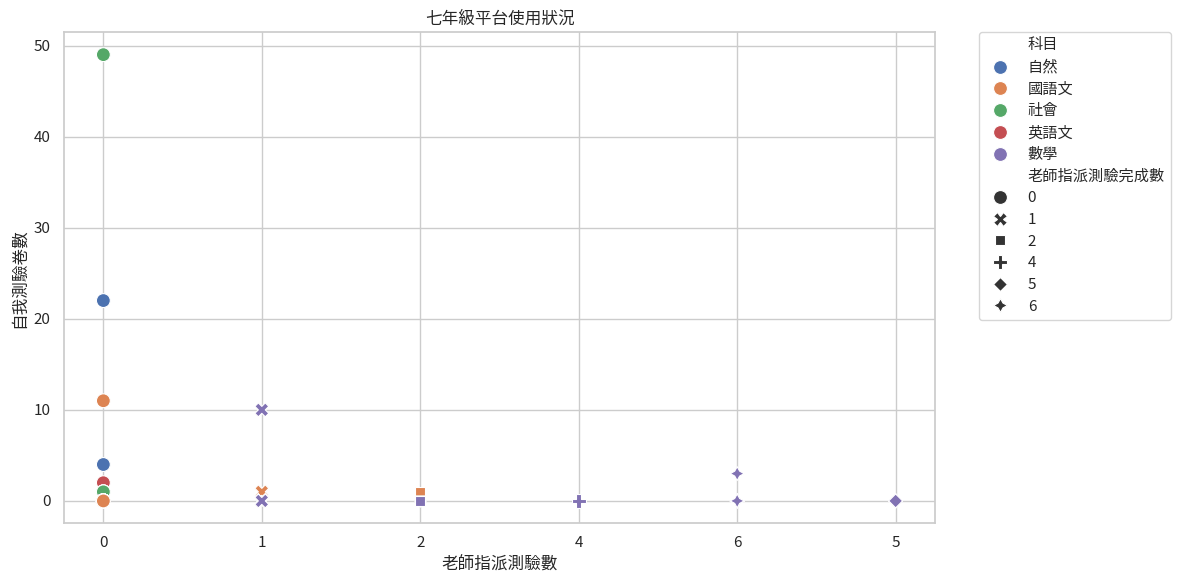

In [21]:
# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_7,
    x="老師指派測驗數",
    y="自我測驗卷數",
    hue="科目",
    style="老師指派測驗完成數",
    s=100,
)
plt.title("七年級平台使用狀況")
plt.xlabel("老師指派測驗數")
plt.ylabel("自我測驗卷數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)
plt.tight_layout()
plt.show()

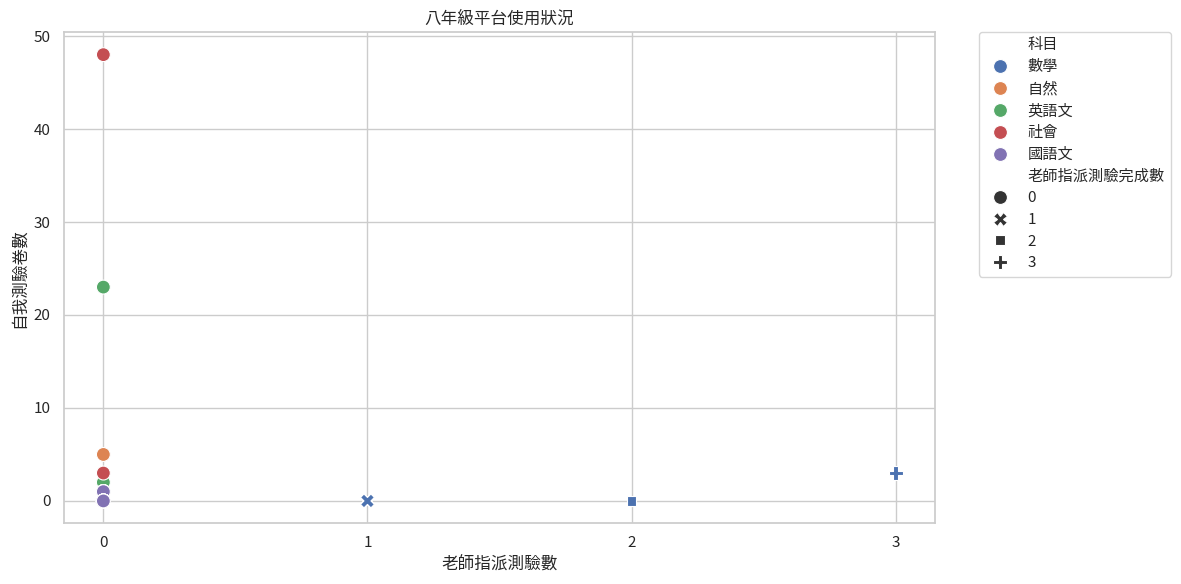

In [27]:
# 讀取
df_8=df_0[df_0["年級"].isin([8])]

# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_8,
    x="老師指派測驗數",
    y="自我測驗卷數",
    hue="科目",
    style="老師指派測驗完成數",
    s=100,
)
plt.title("八年級平台使用狀況")
plt.xlabel("老師指派測驗數")
plt.ylabel("自我測驗卷數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)
plt.tight_layout()
plt.show()

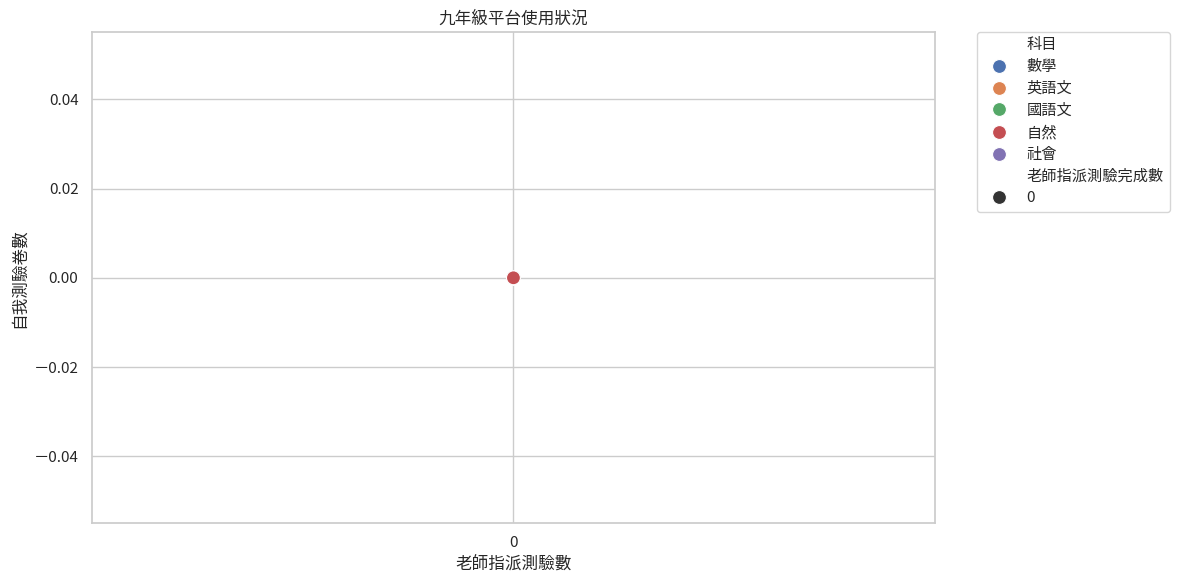

In [23]:
# 讀取
df_9=df_0[df_0["年級"].isin([9])]

# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_9,
    x="老師指派測驗數",
    y="自我測驗卷數",
    hue="科目",
    style="老師指派測驗完成數",
    s=100,
)
plt.title("九年級平台使用狀況")
plt.xlabel("老師指派測驗數")
plt.ylabel("自我測驗卷數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)
plt.tight_layout()
plt.show()

可以看出  
- 七年級只有數學科與國語文老師在使用平台，部分學生會使用平台自主學習
- 八年級只有數學科在使用平台，部分學生會使用平台自主學習
- 九年級無老師與學生使用平台  

因此單獨分離出這兩科看各班使用狀況。  
由於'自我練習平均成績'='指派測驗平均成績'，因此老師沒用此平台出測驗的話，無法判讀學生學習成效，故不會再對此部分進行深入討論。

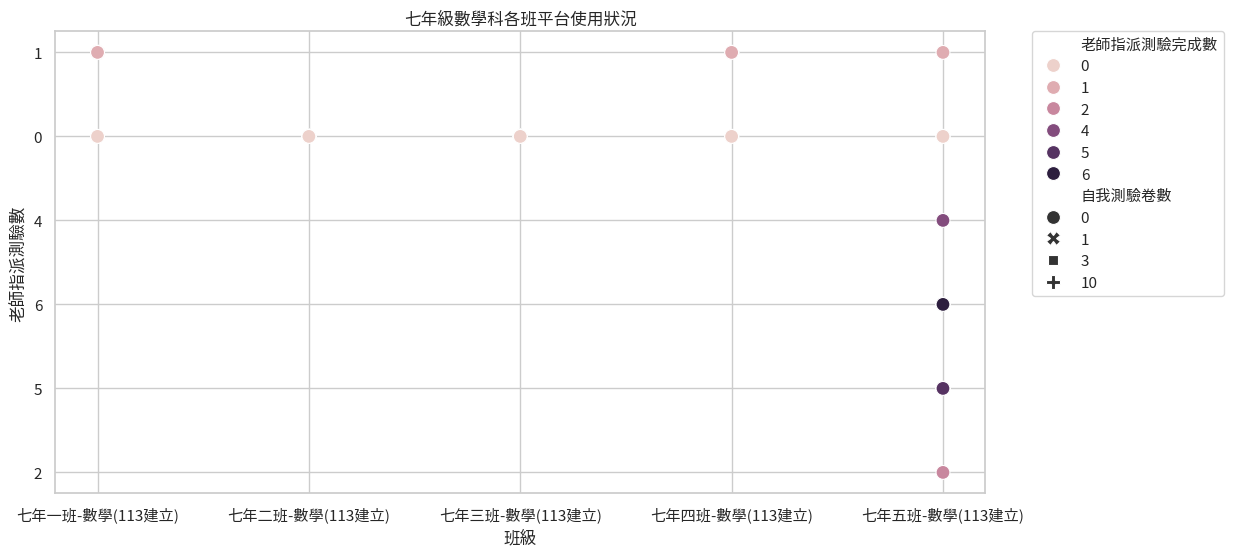

In [40]:
# 讀取
df_7_c_m=df_7[df_7["科目"].isin(["數學"])]

# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_7_c_m,
    x="班級",
    y="老師指派測驗數",
    hue="老師指派測驗完成數",
    style="自我測驗卷數",
    s=100,
)

plt.title("七年級數學科各班平台使用狀況")
plt.xlabel("班級")
plt.ylabel("老師指派測驗數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)

plt.show()

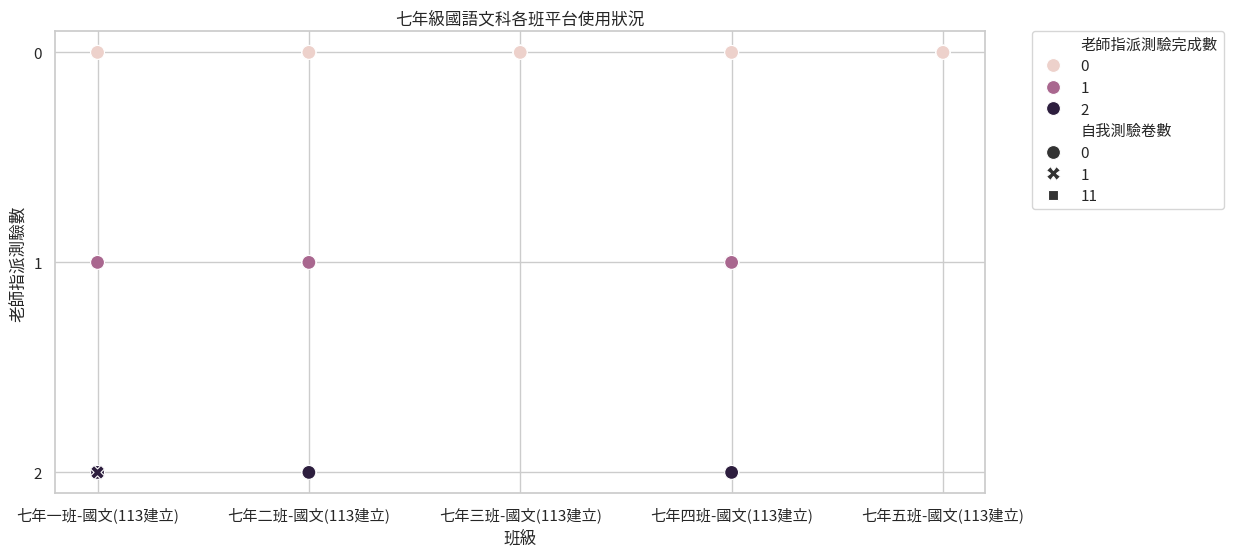

In [41]:
# 讀取
df_7_c_c=df_7[df_7["科目"].isin(["國語文"])]

# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_7_c_c,
    x="班級",
    y="老師指派測驗數",
    hue="老師指派測驗完成數",
    style="自我測驗卷數",
    s=100,
)
plt.title("七年級國語文科各班平台使用狀況")
plt.xlabel("班級")
plt.ylabel("老師指派測驗數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)

plt.show()

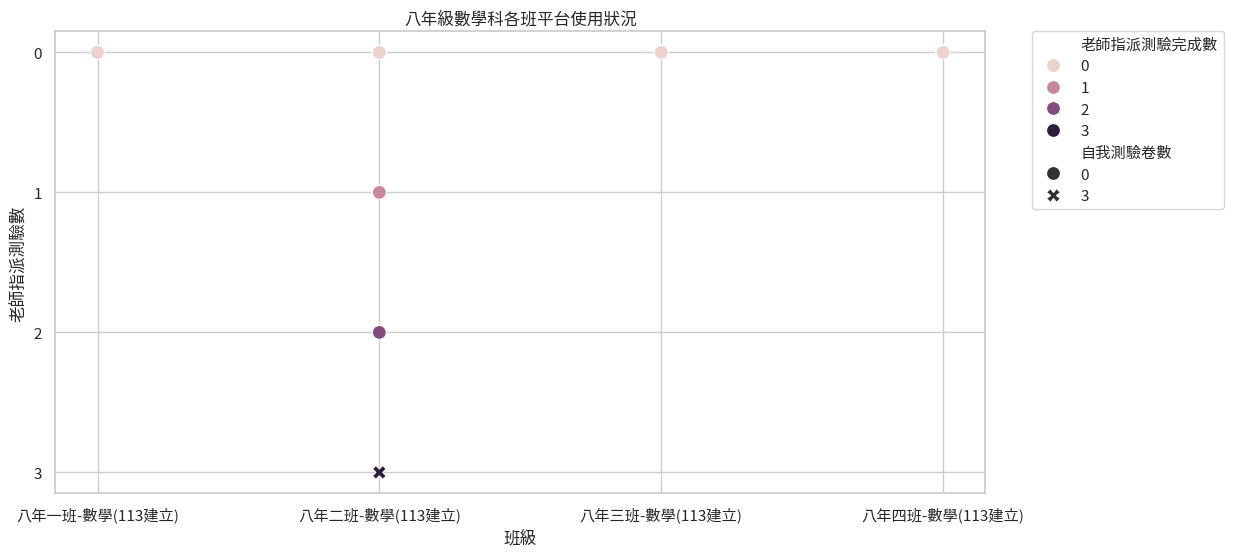

In [42]:
# 讀取
df_8_c_m=df_8[df_8["科目"].isin(["數學"])]

# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_8_c_m,
    x="班級",
    y="老師指派測驗數",
    hue="老師指派測驗完成數",
    style="自我測驗卷數",
    s=100,
)
plt.title("八年級數學科各班平台使用狀況")
plt.xlabel("班級")
plt.ylabel("老師指派測驗數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)

plt.show()

可以看出有在使用的是

數學科：701 704 705 802  
國語文：701 702 704

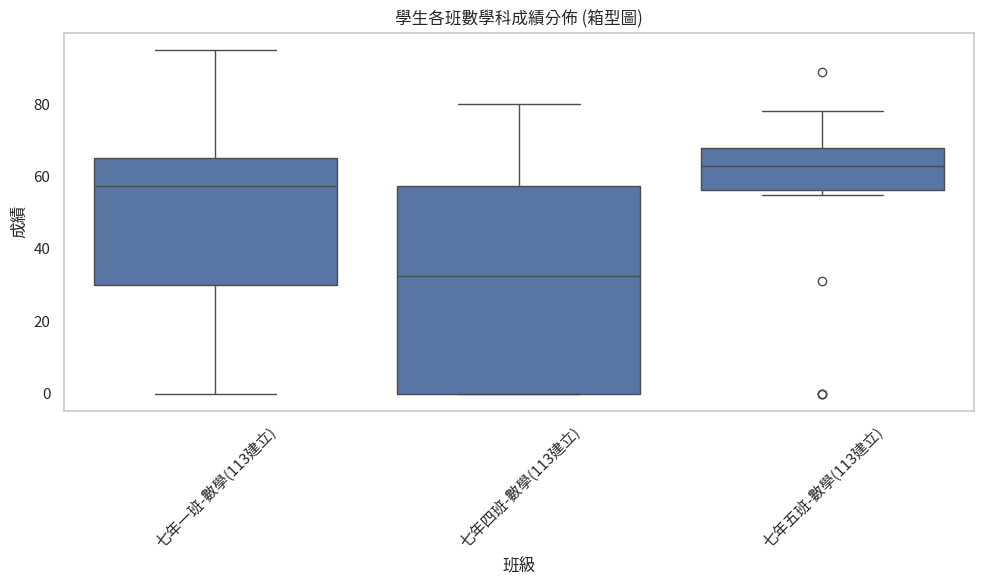

In [46]:
df_7_c_m_s=df_7_c_m[df_7_c_m["班級"].isin(["七年一班-數學(113建立)","七年四班-數學(113建立)","七年五班-數學(113建立)"])]
plt.figure(figsize=(10, 6))
sns.boxplot(x="班級", y="指派測驗平均成績", data=df_7_c_m_s)
plt.title("學生各班數學科成績分佈 (箱型圖)")
plt.xlabel("班級")
plt.ylabel("成績")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

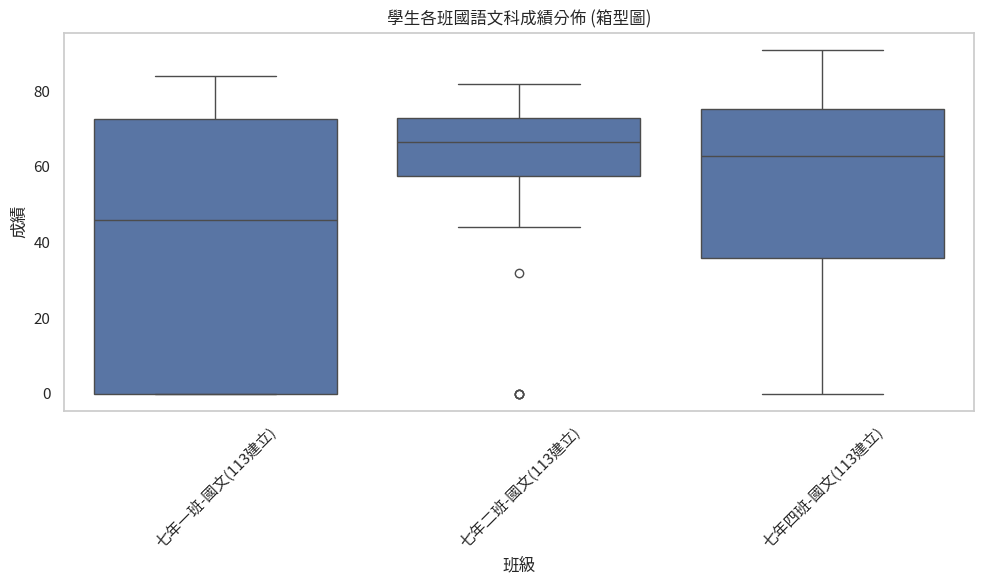

In [56]:
df_7_c_c_s=df_7_c_c[df_7_c_c["班級"].isin(["七年一班-國文(113建立)","七年四班-國文(113建立)","七年二班-國文(113建立)"])]
plt.figure(figsize=(10, 6))
sns.boxplot(x="班級", y="指派測驗平均成績", data=df_7_c_c_s)
plt.title("學生各班國語文科成績分佈 (箱型圖)")
plt.xlabel("班級")
plt.ylabel("成績")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

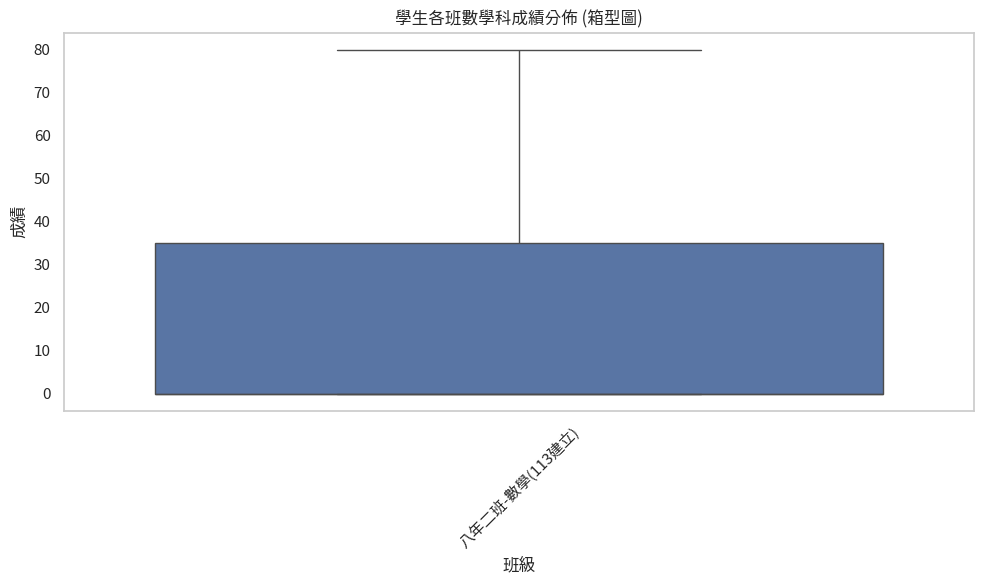

In [52]:
df_8_c_m_s=df_8_c_m[df_8_c_m["班級"].isin(["八年二班-數學(113建立)"])]
plt.figure(figsize=(10, 6))
sns.boxplot(x="班級", y="指派測驗平均成績", data=df_8_c_m_s)
plt.title("學生各班數學科成績分佈 (箱型圖)")
plt.xlabel("班級")
plt.ylabel("成績")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

可以觀察到不分班級成績分布出現異常，回看資料發現，有些老師只給部分學生指派任務，因此再次過濾出老師有指派任務的學生來進行進一步的觀察。

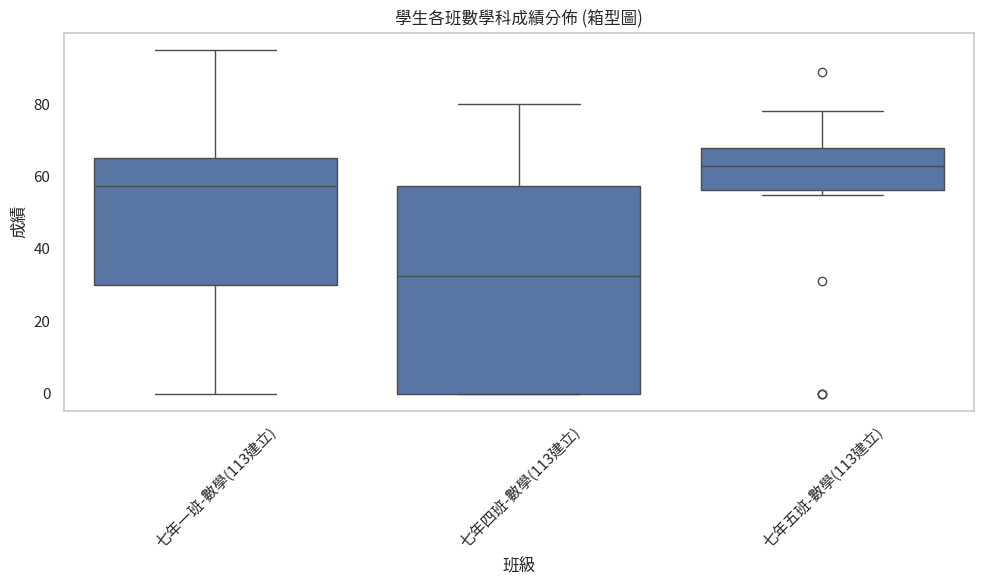

In [55]:
df_7_c_m_s_0 = df_7_c_m_s[df_7_c_m_s["老師指派測驗數"] != 0]
plt.figure(figsize=(10, 6))
sns.boxplot(x="班級", y="指派測驗平均成績", data=df_7_c_m_s_0)
plt.title("學生各班數學科成績分佈 (箱型圖)")
plt.xlabel("班級")
plt.ylabel("成績")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()